# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #7

# Due Date: 4/13/2023

1. Write Python code that performs a fractal compression and does the following:
    - Read the Lena-colored image.
    - Apply fractal compression to the image.
    - Plot the original and compressed images side-by-side.
    - Restore the image from the compression.
    - Plot the histograms of the original and compressed images side-by-side.
    - Print the file sizes of the original, compressed, and restored images.

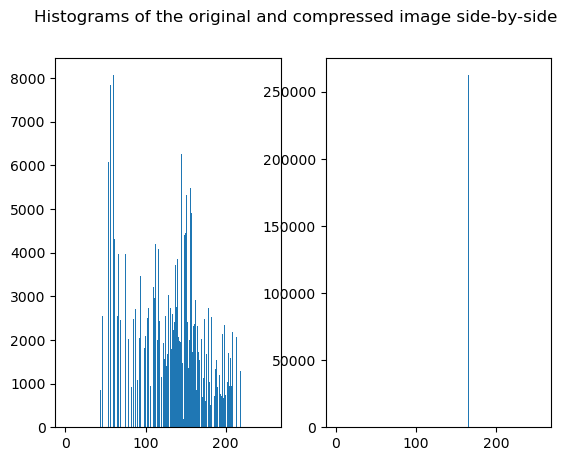

Original size: 475515 bytes
Compressed size: 1359 bytes


In [5]:
# Importing libreries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Reading lena image
lena = cv2.imread('lena_color.png', cv2.IMREAD_GRAYSCALE)

# Set the parameters for the IFS algorithm
NUM_TRANSFORMS = 50
SCALE_FACTOR = 1.0

# Generate the IFS coefficients randomly
transforms = []
for i in range(NUM_TRANSFORMS):
    a = np.random.uniform(-1, 1)
    b = np.random.uniform(-1, 1)
    c = np.random.uniform(-1, 1)
    d = np.random.uniform(-1, 1)
    e = np.random.uniform(-1, 1)
    f = np.random.uniform(-1, 1)
    transforms.append(np.array([[a, b, e], [c, d, f], [0, 0, 1]]))

# Apply the IFS algorithm to compress the image
compressed = np.zeros((lena.shape[0]//2, lena.shape[1]//2))
for i in range(0, lena.shape[0], 2):
    for j in range(0, lena.shape[1], 2):
        block = np.array([[i, j, 1], [i+1, j, 1], [i, j+1, 1], [i+1, j+1, 1]])
        for t in transforms:
            block = SCALE_FACTOR * np.dot(block, t.T)
        compressed[i//2, j//2] = np.mean(lena[block[:,0].astype(int), block[:,1].astype(int)])

# Upsample the compressed image
upsampled = np.zeros((lena.shape[0], lena.shape[1]))
for i in range(0, lena.shape[0], 2):
    for j in range(0, lena.shape[1], 2):
        upsampled[i:i+2, j:j+2] = compressed[i//2, j//2]

# Compressed image
lena_compressed = upsampled.astype(np.uint8)

# Saving the compressed image.
cv2.imwrite('lena_compressed.png', lena_compressed)

# Display the original and compressed images side-by-side.
hstack = np.hstack((lena, lena_compressed))
cv2.imshow('Original and compressed images side-by-side', hstack)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# Plot of the histograms of the original and compressed images side-by-side.
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histograms of the original and compressed image side-by-side')
ax1.hist(lena.ravel(), bins=256, range=(0, 256))
ax2.hist(lena_compressed.ravel(), bins=256, range=(0, 256))
plt.show()

# Print the file sizes.
original = os.path.getsize('lena_color.png')
compressed = os.path.getsize('lena_compressed.png')
print(f'Original size: {original} bytes')
print(f'Compressed size: {compressed} bytes')